# Introduction to AutoEncoders 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [8]:
digits = load_digits()
X = digits.data
y = digits.target

print("Dataset shape:", X.shape)

Dataset shape: (1797, 64)


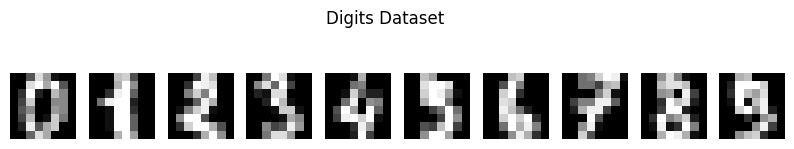

In [9]:
fig, axes = plt.subplots(1, 10, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.axis('off')
plt.suptitle("Digits Dataset")
plt.show()

## Standardization

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Autoencoder on PCA basis

In [12]:
pca = PCA(n_components=20)
X_encoded = pca.fit_transform(X_scaled)

# Decoder
X_decoded = pca.inverse_transform(X_encoded)

print("Original shape:", X_scaled.shape)
print("Encoded (compressed) shape:", X_encoded.shape)
print("Decoded (reconstructed) shape:", X_decoded.shape)

Original shape: (1797, 64)
Encoded (compressed) shape: (1797, 20)
Decoded (reconstructed) shape: (1797, 64)


## Visualization

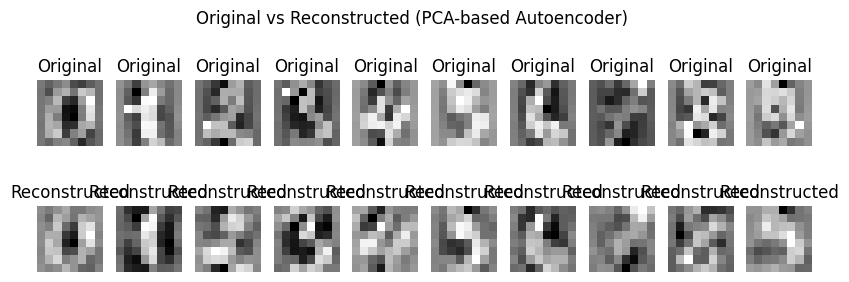

In [13]:
n = 10
plt.figure(figsize=(10, 3))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_scaled[i].reshape(8, 8), cmap='gray')
    plt.title("Original")
    plt.axis("off")
    
    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_decoded[i].reshape(8, 8), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.suptitle("Original vs Reconstructed (PCA-based Autoencoder)", y=1.05)
plt.show()

## Reconstruction Error

In [14]:
reconstruction_error = np.mean((X_scaled - X_decoded)**2)
print("Mean Reconstruction Error:", reconstruction_error)

Mean Reconstruction Error: 0.19716569924267316


## Explained Vairance

In [15]:
explained_variance = np.sum(pca.explained_variance_ratio_)
print("Explained Variance by 20 Components:", explained_variance)

Explained Variance by 20 Components: 0.7931376270240809
